In [35]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [36]:
def g(x,y):
    return x + y


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
y0 = torch.tensor([[float(0)]], device=device)

In [37]:
class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(1,100)
        self.fc2 = nn.Linear(100,200)
        self.fc3 = nn.Linear(200,300)
        self.fc4= nn.Linear(300,1)

    def forward(self,x):
        x = torch.nn.functional.sigmoid(self.fc1(x))
        x = torch.nn.functional.sigmoid(self.fc2(x))
        x = torch.nn.functional.sigmoid(self.fc3(x))
        x = self.fc4(x)
        return x

In [38]:
def loss(model,x):
    f = model(x)
    der_f = torch.autograd.grad(f, x,create_graph=True,grad_outputs=torch.ones_like(f))[0]
    return ((der_f - g(x=x, y=f)) ** 2)

def loss_initial(model,y0):
    x0 =torch.tensor([[float(0)]], device = device)
    f = model(x0)
    return (f-y0)**2



In [39]:
model = NeuralNet()
model = model.to(device)
optimizer = torch.optim.Adam(model.parameters())

In [40]:
x = torch.linspace(0,1,100, device=device).unsqueeze(1)
x.requires_grad = True

In [41]:
for epoch in range(500):

    optimizer.zero_grad()

    cost = loss(model, x) + loss_initial(model,y0) 
    cost = cost.sum()
    cost.backward()
    optimizer.step()
    if epoch % 10 == 0:
        print(f'Epoch {epoch}, Loss: {cost}')

Epoch 0, Loss: 21.754043579101562
Epoch 10, Loss: 24.66740608215332
Epoch 20, Loss: 22.599414825439453
Epoch 30, Loss: 21.23061180114746
Epoch 40, Loss: 20.976964950561523
Epoch 50, Loss: 20.952863693237305
Epoch 60, Loss: 20.934934616088867
Epoch 70, Loss: 20.915359497070312
Epoch 80, Loss: 20.89205551147461
Epoch 90, Loss: 20.861373901367188
Epoch 100, Loss: 20.823780059814453
Epoch 110, Loss: 20.778188705444336
Epoch 120, Loss: 20.719207763671875
Epoch 130, Loss: 20.641361236572266
Epoch 140, Loss: 20.53571891784668
Epoch 150, Loss: 20.388402938842773
Epoch 160, Loss: 20.175537109375
Epoch 170, Loss: 19.851566314697266
Epoch 180, Loss: 19.329124450683594
Epoch 190, Loss: 18.442075729370117
Epoch 200, Loss: 16.897951126098633
Epoch 210, Loss: 14.277061462402344
Epoch 220, Loss: 10.247885704040527
Epoch 230, Loss: 5.258419513702393
Epoch 240, Loss: 1.3116408586502075
Epoch 250, Loss: 0.19318652153015137
Epoch 260, Loss: 0.2853623926639557
Epoch 270, Loss: 0.1597232222557068
Epoch 280,

In [42]:
model.eval()
f = model(x)

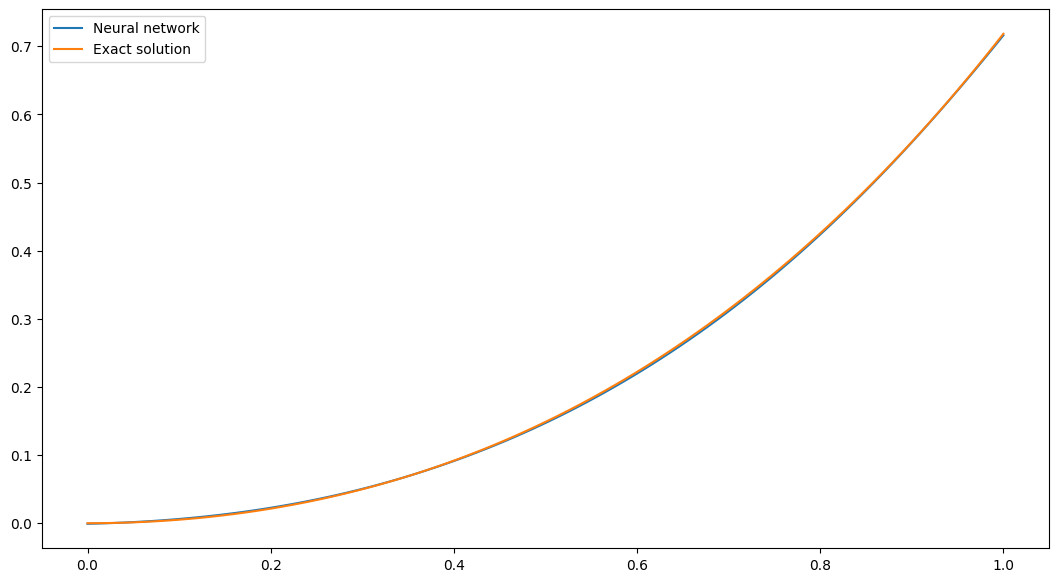

In [43]:
plt.figure(figsize=(13, 7))
plt.plot(x.detach().numpy(), f.detach().numpy(), label='Neural network')
plt.plot(x.detach().numpy(), (torch.exp(x)-x-1).detach().numpy(), label='Exact solution')
plt.legend()